ANALISE DOS DADOS ELEITORAIS DF 2014

O objetivo desse trabalho é realizar uma analise dos dados de votação retirados do site do TSE.
link de acesso:http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
Arquivo: Votação nominal por município e zona (formato ZIP)
    
    Os dados são disponiblizados atráves do formato txt, foi criado um arquivo csv para a importação no jupyter.

    votacao_candidato_munzona_2014_DF.csv

In [86]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Criando o DataFrame

df = pd.read_csv('votacao_candidato_munzona_2014_DF.csv', sep=';', encoding='cp1252', usecols=[9, 14, 15, 21, 28])


df.head ()

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
0,1,TONINHO DO PSOL,GOVERNADOR,NÃO ELEITO,2092
1,1,ROLLEMBERG,GOVERNADOR,2º TURNO,33044
2,1,AGNELO QUEIROZ,GOVERNADOR,NÃO ELEITO,8720
3,1,REGUFFE,SENADOR,ELEITO,38603
4,1,PROFESSOR BATISTA,DEPUTADO FEDERAL,NÃO ELEITO,60


In [87]:
# Tipologia das colunas
df.dtypes

NUMERO_ZONA             int64
NOME_URNA_CANDIDATO    object
DESCRICAO_CARGO        object
DESC_SIT_CAND_TOT      object
TOTAL_VOTOS             int64
dtype: object

In [88]:
# Verificando a quantidade de registros do arquivo.
df.count()

NUMERO_ZONA            23583
NOME_URNA_CANDIDATO    23583
DESCRICAO_CARGO        23583
DESC_SIT_CAND_TOT      23583
TOTAL_VOTOS            23583
dtype: int64

In [89]:
# Existe algum valor nulo no arquivo?
df.isnull().sum()

NUMERO_ZONA            0
NOME_URNA_CANDIDATO    0
DESCRICAO_CARGO        0
DESC_SIT_CAND_TOT      0
TOTAL_VOTOS            0
dtype: int64

In [90]:
# Encontrado apenas os candidatos que foram eleitos.
df[df['DESC_SIT_CAND_TOT'] == 'ELEITO']

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
3,1,REGUFFE,SENADOR,ELEITO,38603
8,1,ROLLEMBERG,GOVERNADOR,ELEITO,40549
1122,2,ROLLEMBERG,GOVERNADOR,ELEITO,38696
1129,2,REGUFFE,SENADOR,ELEITO,39699
2248,3,ROLLEMBERG,GOVERNADOR,ELEITO,27101
2258,3,REGUFFE,SENADOR,ELEITO,28933
3368,4,REGUFFE,SENADOR,ELEITO,47247
3671,4,ROLLEMBERG,GOVERNADOR,ELEITO,41173
4494,5,ROLLEMBERG,GOVERNADOR,ELEITO,52411
4504,5,REGUFFE,SENADOR,ELEITO,50553


In [3]:
# Criando um novo DataFrame apenas com os candidatos a DEPUTADO DISTRITAL
df_2 = df[df.DESCRICAO_CARGO.str.contains("DEPUTADO DISTRITAL")]

df_2.head(3)

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,TOTAL_VOTOS
128,1,ADOLFO COSTA,DEPUTADO DISTRITAL,121
129,1,AMANDA MELO,DEPUTADO DISTRITAL,4
130,1,TENENTE GLAUCY,DEPUTADO DISTRITAL,0


In [5]:
# Agrupando os votos por zonas eleitorais.
df_candidato = df_2.groupby('NOME_URNA_CANDIDATO')

In [4]:
# Criando uma tabela com a quantidade de votos de cada deputado em cada zona eleitoral
pd.pivot_table(df_2, index=["NOME_URNA_CANDIDATO"], columns=["NUMERO_ZONA"], aggfunc='sum', margins= True)

TOTAL_VOTOS                                      \
NUMERO_ZONA                           1      2      3      4      5      6   
NOME_URNA_CANDIDATO                                                          
ABENÇOADO EUDE                      499     15     11     44     15     19   
ACN GAMA                              1      1      7      5      7      8   
ADAGLION AIRES                       19     17      6      5     21      0   
ADELINO DOS BOIS O GAUCHO             4      1      2     33      2      7   
ADELMO GUERRA                         1      3      5      3     32      5   
ADEMILTON PAVÃO                      12     12      4      7      1      1   
ADEMIR JUNIOR                        82     28     98     50     60     19   
ADENIR BOIADEIRO                      8      9      4      4     13     12   
ADERBAL IMÓVEIS                      23     18     19      9      6      7   
ADERIVALDO CARDOSO                   46     33     94     77     49     22   
ADIBE MECÂNICO                        0      0      0      0      0      0   
ADILSON BARRETO                     137   1070     11     18    154     44   
ADILSON GOMES                         0      0      4      7      0      2   
ADIVALDO ANJOS                        0      1      1      3      5     81   
ADIVAN ENEIAS(DO PILÃO)               4      2      0      1      2     19   
ADOLFO COSTA                        121    262      3      8     58     42   
ADOLFO SACHSIDA                     374    241     78     63    116     25   
ADRIANA AVELINO                       1      0      0      0      2      0   
ADRIANA MARQUES                       3      3      4      7      4      0   
ADRIANA PEDERNEIRAS                  89     60     41     71     69     27   
ADRIANO LEVAY                        18     82     25     43     82     31   
ADÃO ROCHA                            1      0      3     23      1      1   
ADÉCIO SARTORI                      927    193     84     47    104     35   
ADÉLIA FREJAT                       230    193    201     83    105     31   
AFFONSO SIMPLES ASSIM                19     29     21     77     22     10   
AGACIEL MAIA                        435   1178    527    839    733   1894   
AGENILDO NERI                        20     57     65     50     27     27   
AGENTE CELIO RODOLFO                  4     25      0      0     96      8   
AGORA É DANIEL                        4     11    157     29     14     13   
AGUINALDO DE JESUS                   13     28     36     35     46     11   
...                                 ...    ...    ...    ...    ...    ...   
WARISMANN                             2      0      0     99      4      3   
WASHINGTON FRENTISTA                 47     18      6     19     12      6   
WASHINGTON MESQUITA                 182    144   1061    429    202     77   
WASHINGTON VALLE                      2      1      6      1      2      1   
WASNY DE ROURE                      971   1052    828   1356   1157    672   
WELLINGTON DOS AMIGOS                 1      0     11      6      2      0   
WELLINGTON LUIZ                     341    477    336    532    456    448   
WELLINGTON VIANA                     45     15     30     32     30    487   
WENDELL VILELA                       22     32     58    118     43     55   
WILMA LIMA                            4      2      2      7      3      2   
WILMA SIMÃO DE LIMA                   2      2      1      0      0      1   
WILMAN NEPOMUCENO                     1      0      6      2      0      0   
WILSON GREY                           5      3     22      7     20      8   
WILSON LIMA                          69     29     27   1453     53     18   
XUXA                                  0      0      1      1      2     16   
ZEQUINHA AMIGO DO ESPORTE             2      3     60      1      2      0   
ZEZINHO FRAZÃO                        1      2      0    591      0      0   
ZEZÃO DO POVÃO                        0      8   

In [10]:
# Estudando os votos da Candidata Leila do Vôlei
# Criando um DataFrame específico para a candidata

df_leila = df[df['NOME_URNA_CANDIDATO'] == 'LEILA DO VÔLEI']

df_leila.head(21)

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,TOTAL_VOTOS
675,1,LEILA DO VÔLEI,DEPUTADO DISTRITAL,812
1769,2,LEILA DO VÔLEI,DEPUTADO DISTRITAL,411
2894,3,LEILA DO VÔLEI,DEPUTADO DISTRITAL,433
4028,4,LEILA DO VÔLEI,DEPUTADO DISTRITAL,348
5150,5,LEILA DO VÔLEI,DEPUTADO DISTRITAL,321
6272,6,LEILA DO VÔLEI,DEPUTADO DISTRITAL,85
7394,7,LEILA DO VÔLEI,DEPUTADO DISTRITAL,56
8516,8,LEILA DO VÔLEI,DEPUTADO DISTRITAL,227
9638,9,LEILA DO VÔLEI,DEPUTADO DISTRITAL,993
10761,10,LEILA DO VÔLEI,DEPUTADO DISTRITAL,709


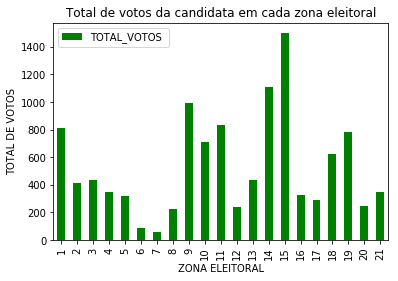

In [37]:
# Criando um gráfico para os votos obtidos pela candidata em cada zona eleitoral
df_leila.plot('NUMERO_ZONA', kind='bar', color='green')
plt.title('Total de votos da candidata em cada zona eleitoral')

plt.xlabel('ZONA ELEITORAL')
plt.ylabel('TOTAL DE VOTOS')

plt.show()